In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
data=pd.read_csv('Trial_Joint_Angles.csv')
X = data.T.iloc[2:]
X.shape

(38, 15799)

In [77]:
# constant value
X = np.full((5, 100), 20)


In [94]:
# random value

X = np.random.rand(10, 100)  # Replace with your actual data

In [85]:
# Sin value

# Generate an array of time points
time_points = np.linspace(0, 2*np.pi, 100)

# Create the matrix X with sinusoidal values
X = np.sin(time_points)

# Repeat the sine wave for each row
X = np.tile(X, (5, 1))

In [17]:
# Create the X matrix with sinusoidal and linear values
num_rows = 2
num_columns = 100

# Generate an array of time points
time_points = np.linspace(0, 2*np.pi, num_columns)

# Create the first row with sinusoidal values
sin_values = np.sin(time_points)

# Create the second row with linearly increasing values
linear_values = np.linspace(0, 1, num_columns)

# Combine the rows to create the matrix X
X = np.vstack((sin_values, linear_values))

# print(X)


In [64]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


window_size = 5
smoothed_data = pd.DataFrame(moving_average(X.iloc[4], window_size))

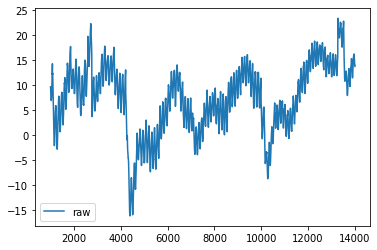

In [125]:
start = 1000
end = 14000
plt.plot(X.iloc[4,start:end], label = 'raw')
#plt.plot(smoothed_data.loc[start:end], label = 'smooth')
plt.legend()

In [126]:
import numpy as np
import pandas as pd
from scipy.linalg import svd

# Construct data matrices for DMD
X1 = X.iloc[:, :-1]
X2 = X.iloc[:, 1:]

# Perform Singular Value Decomposition (SVD)
U, s, Vh = svd(X1, full_matrices=False)
s_ = np.diag(s)
Vh_ = Vh.conj().T
# Approximate the A matrix using DMD formula
Atilde = np.dot(np.dot(U.T, X2), Vh_)@ np.linalg.inv(s_) 


# Compute eigenvalues and eigenvectors of Atilde
eigenvalues, eigenvectors = np.linalg.eig(Atilde)

# Compute DMD modes
DMD_modes = np.dot(np.dot(X2, Vh_), np.linalg.inv(s_)) @ eigenvectors
pd.DataFrame(DMD_modes)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.004465-0.009000j,0.004465+0.009000j,0.001882+0.005441j,0.001882-0.005441j,-0.022354-0.009363j,-0.022354+0.009363j,0.004369-0.002491j,0.004369+0.002491j,-0.003961-0.003736j,-0.003961+0.003736j,...,0.005536+0.029181j,0.005536-0.029181j,-0.013348+0.011485j,-0.013348-0.011485j,0.017474+0.000000j,0.020301+0.008960j,0.020301-0.008960j,-0.034634+0.000000j,-0.000368-0.000759j,-0.000368+0.000759j
1,0.000101-0.001479j,0.000101+0.001479j,-0.009620+0.005896j,-0.009620-0.005896j,-0.015638+0.038918j,-0.015638-0.038918j,0.001475+0.001994j,0.001475-0.001994j,-0.030614+0.004559j,-0.030614-0.004559j,...,-0.046252+0.073788j,-0.046252-0.073788j,0.036046+0.005306j,0.036046-0.005306j,-0.148502+0.000000j,0.185181-0.063239j,0.185181+0.063239j,0.430719+0.000000j,0.001146-0.052972j,0.001146+0.052972j
2,-0.004219-0.011362j,-0.004219+0.011362j,0.006761+0.017901j,0.006761-0.017901j,-0.002240-0.018779j,-0.002240+0.018779j,0.021227-0.010658j,0.021227+0.010658j,0.001055-0.007112j,0.001055+0.007112j,...,-0.070660-0.052108j,-0.070660+0.052108j,-0.005865-0.076646j,-0.005865+0.076646j,-0.241398+0.000000j,-0.030945+0.012426j,-0.030945-0.012426j,0.058037+0.000000j,-0.048635+0.055961j,-0.048635-0.055961j
3,-0.006164-0.015262j,-0.006164+0.015262j,0.002267+0.005378j,0.002267-0.005378j,-0.026802+0.010294j,-0.026802-0.010294j,0.012544-0.018958j,0.012544+0.018958j,0.003769-0.013561j,0.003769+0.013561j,...,-0.001000-0.002432j,-0.001000+0.002432j,0.012266-0.001886j,0.012266+0.001886j,0.022500+0.000000j,-0.022289-0.019259j,-0.022289+0.019259j,0.000839+0.000000j,0.009024-0.019541j,0.009024+0.019541j
4,0.024633-0.002791j,0.024633+0.002791j,-0.019645-0.012711j,-0.019645+0.012711j,-0.035463-0.067345j,-0.035463+0.067345j,0.003941-0.008095j,0.003941+0.008095j,0.014181-0.044415j,0.014181+0.044415j,...,-0.015836-0.012424j,-0.015836+0.012424j,-0.034427-0.077962j,-0.034427+0.077962j,0.088117+0.000000j,-0.128654+0.005483j,-0.128654-0.005483j,-0.376877+0.000000j,-0.008297+0.046217j,-0.008297-0.046217j
5,-0.004487+0.012792j,-0.004487-0.012792j,0.013562-0.016574j,0.013562+0.016574j,-0.008865+0.002730j,-0.008865-0.002730j,-0.014089+0.006669j,-0.014089-0.006669j,-0.003896+0.003183j,-0.003896-0.003183j,...,0.009920+0.009496j,0.009920-0.009496j,-0.008573-0.001259j,-0.008573+0.001259j,-0.001235+0.000000j,0.011560+0.017083j,0.011560-0.017083j,-0.038127+0.000000j,-0.010597+0.004479j,-0.010597-0.004479j
6,-0.018235+0.004038j,-0.018235-0.004038j,0.017061-0.009065j,0.017061+0.009065j,-0.001233-0.012308j,-0.001233+0.012308j,0.023515-0.006347j,0.023515+0.006347j,-0.001741+0.009157j,-0.001741-0.009157j,...,-0.017714-0.002048j,-0.017714+0.002048j,-0.008757+0.010169j,-0.008757-0.010169j,0.065570+0.000000j,0.033646-0.018679j,0.033646+0.018679j,0.047894+0.000000j,0.023511+0.015468j,0.023511-0.015468j
7,-0.018100-0.009345j,-0.018100+0.009345j,-0.000247+0.012590j,-0.000247-0.012590j,-0.025970-0.033845j,-0.025970+0.033845j,-0.009062-0.063335j,-0.009062+0.063335j,0.020762-0.016679j,0.020762+0.016679j,...,0.020883+0.029120j,0.020883-0.029120j,-0.005049-0.000648j,-0.005049+0.000648j,0.059614+0.000000j,0.070008+0.087005j,0.070008-0.087005j,0.401378+0.000000j,-0.039924-0.032574j,-0.039924+0.032574j
8,0.008603-0.010967j,0.008603+0.010967j,-0.002989+0.013369j,-0.002989-0.013369j,-0.014003-0.026692j,-0.014003+0.026692j,-0.020255+0.039107j,-0.020255-0.039107j,0.013675-0.021273j,0.013675+0.021273j,...,0.013809+0.009958j,0.013809-0.009958j,-0.016432-0.006989j,-0.016432+0.006989j,-0.049551+0.000000j,-0.014638+0.027956j,-0.014638-0.027956j,-0.038998+0.000000j,-0.016048+0.011317j,-0.016048-0.011317j
9,-0.026811-0.007425j,-0.026811+0.007425j,0.002412+0.022813j,0.002412-0.022813j,-0.048678-0.033110j,-0.048678+0.033110j,0.005370-0.014857j,0.005370+0.014857j,-0.005954-0.042628j,-0.005954+0.042628j,...,-0.007178+0.005669j,-0.007178-0.005669j,0.017501+0.016154j,0.017501-0.016154j,0.047609+0.000000j,-0.017362-0.020001j,-0.017362+0.020001j,-0.066678+0.000000j,0.016828-0

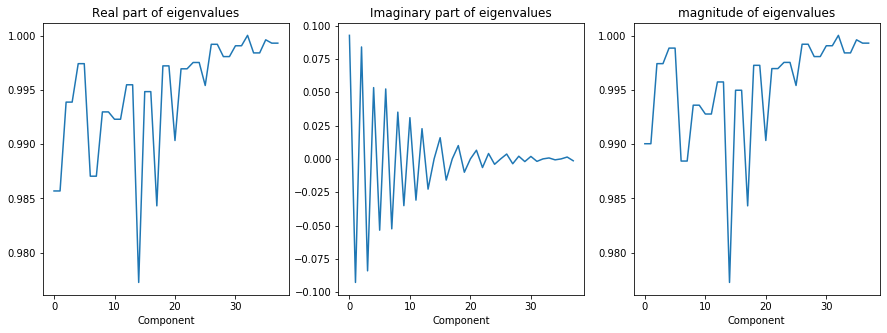

In [127]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot real parts of Eigenvalues
axes[0].plot(np.real(eigenvalues))
axes[0].set_xlabel('Component')
#axes[0].set_ylabel('Values')
axes[0].set_title('Real part of eigenvalues')

# Plot imaginary parts of Eigenvalues
axes[1].plot(np.imag(eigenvalues))
axes[1].set_xlabel('Component')
#axes[1].set_ylabel('Values')
axes[1].set_title('Imaginary part of eigenvalues')

# Plot magnitude of Eigenvalues

axes[2].plot(np.abs(eigenvalues))
axes[2].set_xlabel('Component')
#axes[2].set_ylabel('Values')
axes[2].set_title('magnitude of eigenvalues')

plt.show()

In [107]:
# Truncate the SVD matrices to reduce dimensions
rank =5  # Choose the rank based on desired dimensions
Ur = U[:, :rank]
Sr = np.diag(s)[:rank, :rank]
Vhr = Vh.conj().T[:,:rank]

# Approximate the A matrix using DMD formula
Atilde = np.dot(np.dot(Ur.T, X2), Vhr)@ np.linalg.inv(Sr) 


# Compute eigenvalues and eigenvectors of Atilde
eigenvalues, eigenvectors = np.linalg.eig(Atilde)

# Compute DMD modes
DMD_modes = np.dot(np.dot(X2, Vhr), np.linalg.inv(Sr)) @ eigenvectors
pd.DataFrame(DMD_modes)

,0,1,2,3,4
0,0.000059+0.000000j,0.010655+0.000000j,0.002630+0.000000j,-0.000350-0.001324j,-0.000350+0.001324j
1,-0.011694+0.000000j,-0.165357+0.000000j,-0.007287+0.000000j,0.017448+0.029888j,0.017448-0.029888j
2,-0.005105+0.000000j,0.009699+0.000000j,0.000305+0.000000j,-0.005766-0.007398j,-0.005766+0.007398j
3,0.001128+0.000000j,-0.027787+0.000000j,-0.001535+0.000000j,-0.030073-0.003036j,-0.030073+0.003036j
4,0.011202+0.000000j,-0.257761+0.000000j,0.002527+0.000000j,-0.034638-0.057978j,-0.034638+0.057978j
5,0.004455+0.000000j,-0.004487+0.000000j,0.000436+0.000000j,-0.011807-0.005919j,-0.011807+0.005919j
6,0.000412+0.000000j,-0.035965+0.000000j,-0.001208+0.000000j,-0.049929-0.035283j,-0.049929+0.035283j
7,-0.007155+0.000000j,-0.142326+0.000000j,-0.013018+0.000000j,-0.034804-0.055695j,-0.034804+0.055695j
8,-0.000844+0.000000j,0.020144+0.000000j,0.001561+0.000000j,-0.049056-0.039589j,-0.049056+0.039589j
9,0.001415+0.000000j,-0.063230+0.000000j,-0.002622+0.000000j,-0.017735-0.040874j,-0.017735+0.040874j


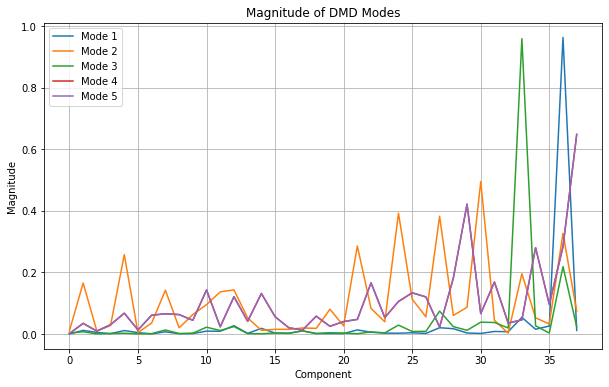

In [26]:
# DMD_modes is a matrix where each column represents a mode

# Plot magnitude of DMD modes
plt.figure(figsize=(10, 6))
for i in range(DMD_modes.shape[1]):
    plt.plot(np.abs(DMD_modes[:, i]), label=f'Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Magnitude')
plt.title('Magnitude of DMD Modes')
plt.legend()
plt.grid()
plt.show()


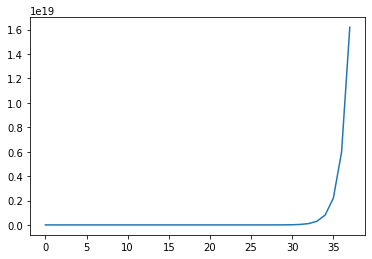

In [82]:
import numpy as np
from scipy.linalg import svd


# Make predictions using DMD modes
initial_state = X1.iloc[:, -1]
predicted_states = []
for i in range(len(X1)):
    predicted_state = np.dot(np.exp(eigenvalues * i), DMD_modes.T) @ initial_state
    predicted_states.append(predicted_state)

predicted_states = np.array(predicted_states)

# Print the predicted states
plt.plot(predicted_states)


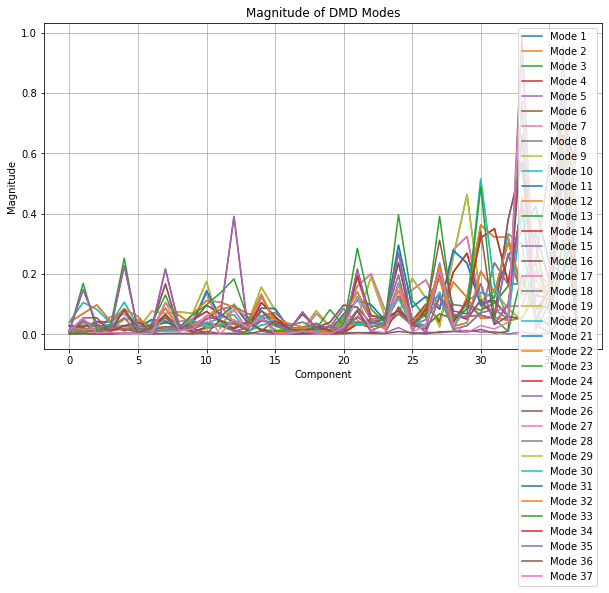

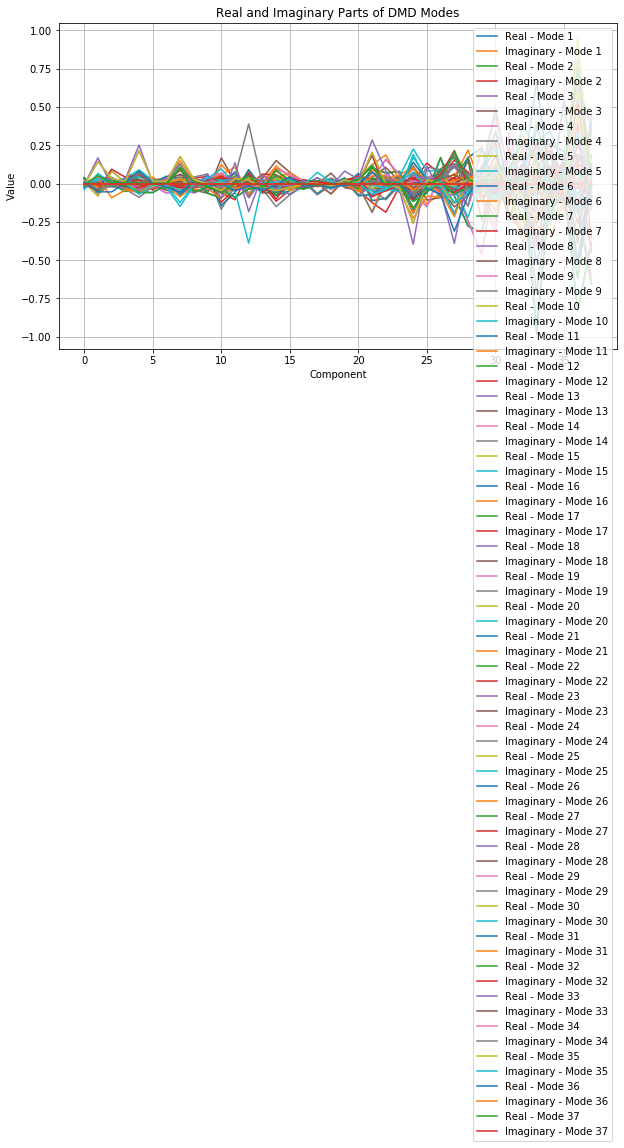

In [74]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have DMD_modes defined previously
# DMD_modes is a matrix where each column represents a mode

# Plot magnitude of DMD modes
plt.figure(figsize=(10, 6))
for i in range(DMD_modes.shape[1]):
    plt.plot(np.abs(DMD_modes[:, i]), label=f'Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Magnitude')
plt.title('Magnitude of DMD Modes')
plt.legend()
plt.grid()
plt.show()

# Plot real and imaginary parts of DMD modes
plt.figure(figsize=(10, 6))
for i in range(DMD_modes.shape[1]):
    plt.plot(np.real(DMD_modes[:, i]), label=f'Real - Mode {i + 1}')
    plt.plot(np.imag(DMD_modes[:, i]), label=f'Imaginary - Mode {i + 1}')
plt.xlabel('Component')
plt.ylabel('Value')
plt.title('Real and Imaginary Parts of DMD Modes')
plt.legend()
plt.grid()
plt.show()
